### 1. Import and data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [2]:
df = pd.read_csv("../data/chess_games_feature.csv")
df.head()

,WhiteElo,BlackElo,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage,ECOID,w_material_early,...,w_castled_early,b_castled_early,w_checks_early,b_checks_early,early_checks,w_piece_activity,b_piece_activity,both_castled_early,total_captures_early,activity_diff
0,2487,2596,1,0,109,2541.5,0,-109,0,20.0,...,1.0,0.0,4.0,2.0,6.0,36.0,36.0,0,15.0,0.0
1,2542,2433,2,0,109,2487.5,1,109,9,16.0,...,0.0,0.0,1.0,3.0,4.0,31.0,20.0,0,15.0,11.0
2,2404,2534,0,0,130,2469.0,0,-130,0,21.0,...,1.0,1.0,0.0,0.0,0.0,33.0,34.0,1,9.0,-1.0
3,2860,2922,1,0,62,2891.0,0,-62,0,33.0,...,1.0,0.0,0.0,0.0,0.0,39.0,39.0,0,4.0,0.0
4,2752,2395,2,0,357,2573.5,1,357,0,18.0,...,0.0,1.0,0.0,1.0,1.0,38.0,28.0,0,14.0,10.0


### 2. Prepare data

In [3]:
X = df.drop(['ResultNumeric'], axis=1)
y = df['ResultNumeric']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (2435474, 33)
Target: (2435474,)


### 3. Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing
    random_state=42,
    stratify=y
)

### 4. Train model

In [5]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,                # Use all CPU cores
)

In [6]:
start_time = time.time()

rf_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

Training completed in 144.19 seconds (2.40 minutes)


### 5. Evaluate

In [7]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)\n")

print("Classification Report: \n")
print(classification_report(y_test, y_pred, target_names=['Black Win', 'Draw', 'White Win']))

Accuracy: 0.6233 (62.33%)

Classification Report: 

              precision    recall  f1-score   support

   Black Win       0.60      0.68      0.64    198257
        Draw       0.84      0.29      0.43     77234
   White Win       0.62      0.70      0.66    211604

    accuracy                           0.62    487095
   macro avg       0.69      0.55      0.57    487095
weighted avg       0.65      0.62      0.61    487095



### 6. Confusion Matrix

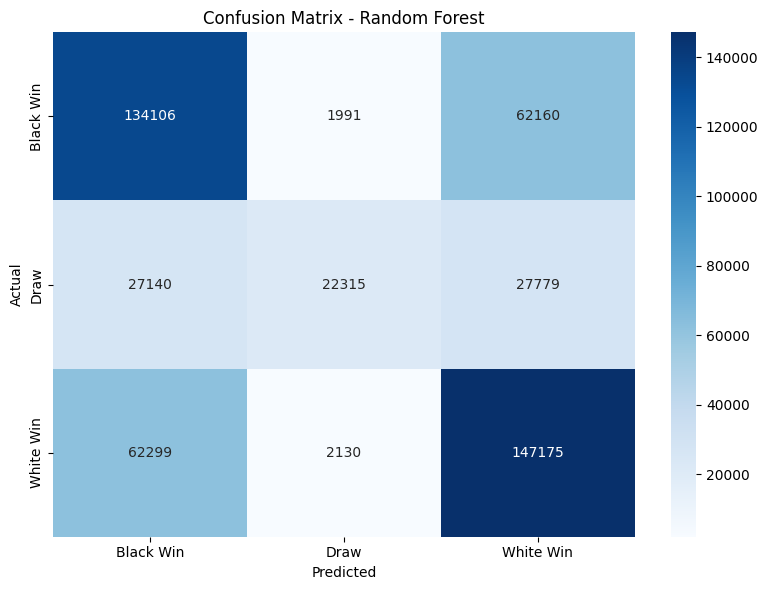

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Black Win', 'Draw', 'White Win'],
            yticklabels=['Black Win', 'Draw', 'White Win'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

### 7. Feature Importance

                  Feature  Importance
10    material_diff_early    0.126755
6    WhiteRatingAdvantage    0.114125
4               AvgRating    0.109630
0                WhiteElo    0.097061
1                BlackElo    0.089572
32          activity_diff    0.056051
3              RatingDiff    0.054281
13     capture_diff_early    0.039602
5      WhiteIsHigherRated    0.033953
16  aggression_diff_early    0.025276
28       w_piece_activity    0.025244
29       b_piece_activity    0.024633
9        b_material_early    0.022018
8        w_material_early    0.021602
2             EventTypeID    0.013012
15     b_aggression_early    0.012817
7                   ECOID    0.012551
14     w_aggression_early    0.010661
19            center_diff    0.010104
31   total_captures_early    0.010062
27           early_checks    0.009650
11       w_captures_early    0.009237
12       b_captures_early    0.009093
22       development_diff    0.008851
26         b_checks_early    0.007907
18       b_c

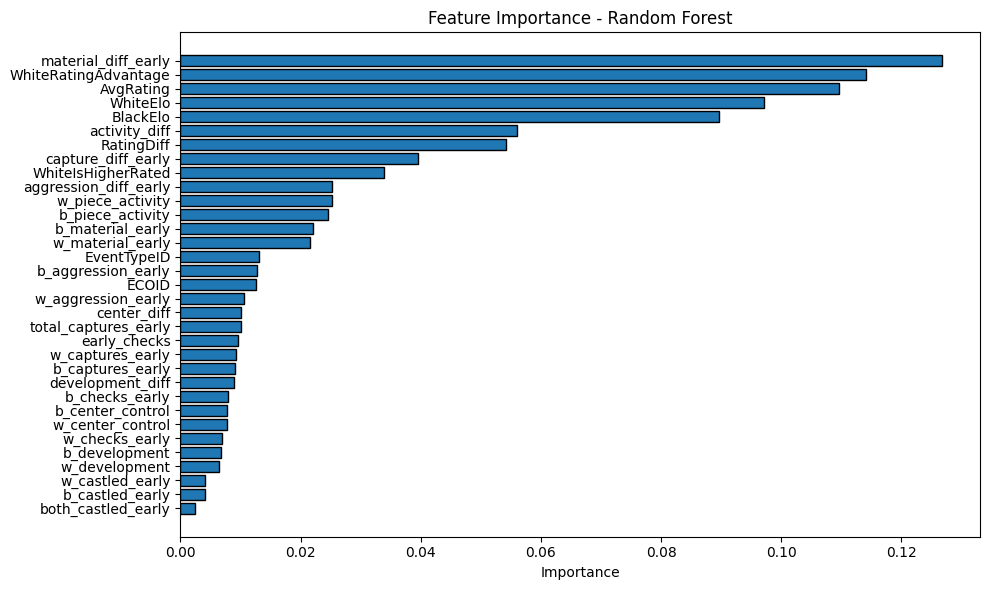

In [9]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], edgecolor="black")
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()